In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/proj2-only-pubds/city_day.csv


# importing libraries

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Loading the dataset

In [4]:
ds = pd.read_csv("/kaggle/input/proj2-only-pubds/city_day.csv")

# dataset insights

## how big is the dataset?

In [5]:
ds.size

472496

## What does the data look like ?

In [6]:
ds.head()

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


## what is the data type of columns ?

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


## Are there any null values?

In [8]:
ds.isnull().sum()

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

In [9]:
df = ds.drop(columns=['City','Date','NO','NOx','NH3','Benzene','Toluene','Xylene','AQI_Bucket'],axis=1)

In [10]:
df.sample(6)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,PM2.5,PM10,NO2,CO,SO2,O3,AQI
15166,7.81,26.51,9.11,0.44,6.20,9.13,63.0
21810,68.13,NaN,22.77,0.83,7.35,26.95,151.0
4254,54.78,96.64,12.80,0.48,18.35,17.00,106.0
12990,821.42,NaN,10.24,0.49,3.67,12.89,529.0
5004,24.98,138.06,42.15,1.76,8.15,8.43,132.0
3007,16.45,32.26,5.66,0.00,NaN,36.76,52.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   24933 non-null  float64
 1   PM10    18391 non-null  float64
 2   NO2     25946 non-null  float64
 3   CO      27472 non-null  float64
 4   SO2     25677 non-null  float64
 5   O3      25509 non-null  float64
 6   AQI     24850 non-null  float64
dtypes: float64(7)
memory usage: 1.6 MB


In [12]:
df.isnull().sum()

PM2.5     4598
PM10     11140
NO2       3585
CO        2059
SO2       3854
O3        4022
AQI       4681
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16010 entries, 1595 to 29530
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   16010 non-null  float64
 1   PM10    16010 non-null  float64
 2   NO2     16010 non-null  float64
 3   CO      16010 non-null  float64
 4   SO2     16010 non-null  float64
 5   O3      16010 non-null  float64
 6   AQI     16010 non-null  float64
dtypes: float64(7)
memory usage: 1000.6 KB


In [16]:
df.head()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
1595,37.55,122.41,85.12,15.08,163.01,48.23,281.0
1596,33.97,116.32,79.71,14.67,91.26,51.86,330.0
1597,35.48,130.07,77.61,18.02,98.35,38.99,356.0
1598,34.11,138.31,75.23,13.27,88.66,42.22,359.0
1599,33.69,111.73,68.90,34.56,80.90,36.95,547.0


In [17]:
df.reset_index(inplace=True)

In [18]:
df.head()

,index,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,1595,37.55,122.41,85.12,15.08,163.01,48.23,281.0
1,1596,33.97,116.32,79.71,14.67,91.26,51.86,330.0
2,1597,35.48,130.07,77.61,18.02,98.35,38.99,356.0
3,1598,34.11,138.31,75.23,13.27,88.66,42.22,359.0
4,1599,33.69,111.73,68.90,34.56,80.90,36.95,547.0


In [19]:
df.drop("index",axis=1,inplace=True)

# updated dataset after preprocessing

In [20]:
df.head()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
0,37.55,122.41,85.12,15.08,163.01,48.23,281.0
1,33.97,116.32,79.71,14.67,91.26,51.86,330.0
2,35.48,130.07,77.61,18.02,98.35,38.99,356.0
3,34.11,138.31,75.23,13.27,88.66,42.22,359.0
4,33.69,111.73,68.90,34.56,80.90,36.95,547.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16010 entries, 0 to 16009
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   16010 non-null  float64
 1   PM10    16010 non-null  float64
 2   NO2     16010 non-null  float64
 3   CO      16010 non-null  float64
 4   SO2     16010 non-null  float64
 5   O3      16010 non-null  float64
 6   AQI     16010 non-null  float64
dtypes: float64(7)
memory usage: 875.7 KB


## How does the data look mathematically ?

In [22]:
df.describe()

,PM2.5,PM10,NO2,CO,SO2,O3,AQI
count,16010.000000,16010.000000,16010.000000,16010.000000,16010.000000,16010.000000,16010.000000
mean,57.342885,117.697931,29.112615,1.434911,12.785969,35.132273,141.355715
std,52.096518,88.484088,22.830288,3.548884,13.496148,21.525602,104.325680
min,0.160000,0.180000,0.010000,0.000000,0.010000,0.010000,14.000000
25%,25.040000,56.620000,12.450000,0.560000,6.120000,19.680000,74.000000
50%,42.910000,95.625000,24.105000,0.840000,9.710000,31.965000,107.000000
75%,69.800000,148.697500,39.370000,1.247500,14.677500,46.200000,167.000000
max,868.660000,847.410000,277.310000,92.960000,186.080000,257.730000,1389.000000


## correlation of columns with the target variable¶


In [23]:
df.corr()['AQI']

PM2.5    0.789445
PM10     0.807309
NO2      0.611989
CO       0.546648
SO2      0.461186
O3       0.297086
AQI      1.000000
Name: AQI, dtype: float64

# Visualizations

## Correlation plot

<Axes: >

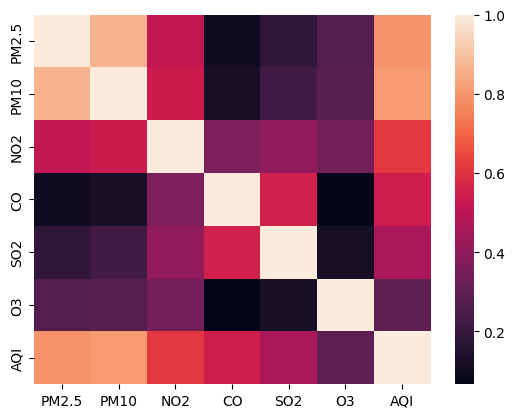

In [24]:
sns.heatmap(df.corr())

# scatterplot


### AQI (target variable) against PM10 (highest corelated variable against the target variable)

<Axes: xlabel='PM10', ylabel='AQI'>

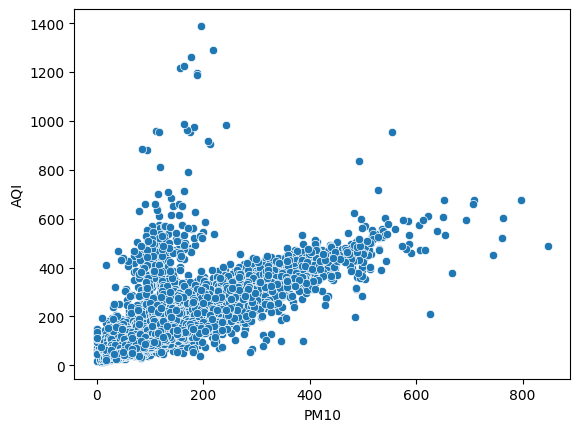

In [25]:
sns.scatterplot(x=df['PM10'], y=df['AQI'])


# Distplot

### distribution of PM2.5 over the dataset¶


<ipython-input-26-b823a508c274>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['PM2.5'])
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='PM2.5', ylabel='Density'>

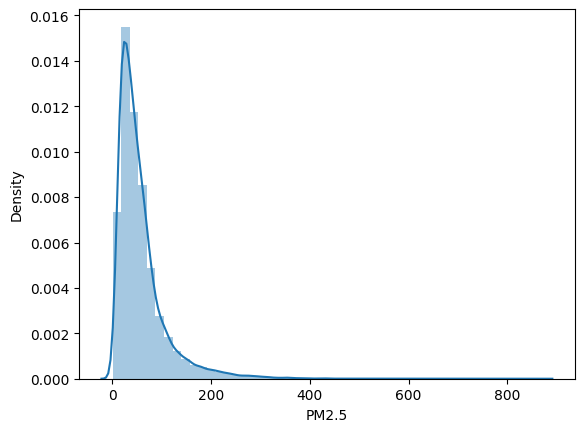

In [26]:
sns.distplot(df['PM2.5'])


# importing libraries for model training

In [27]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Defining features and target

In [28]:

X = df[['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3']]
y = df['AQI']

# Split data into train and test sets

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Further split train data into train and validation sets for meta-model training

In [30]:
X_train_fed, X_val, y_train_fed, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Simulate 5 clients by splitting the data

In [31]:
clients_data = np.array_split(pd.concat([X_train_fed, y_train_fed], axis=1), 5)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


# ANN Model Definition

In [32]:
def ann_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(input_dim,)),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Hyperparameter tuning function

In [33]:
def tune_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search.best_estimator_

# Model Initialization

In [34]:
def model_fn(input_dim):
    rf = RandomForestRegressor()
    xgb = XGBRegressor()
    
    # Hyperparameter tuning
    rf_param_grid = {'n_estimators': [50, 100], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5]}
    xgb_param_grid = {'n_estimators': [50, 100], 'learning_rate': [0.01, 0.1], 'max_depth': [3, 6]}

    rf_tuned = tune_model(rf, rf_param_grid, X_train_fed, y_train_fed)
    xgb_tuned = tune_model(xgb, xgb_param_grid, X_train_fed, y_train_fed)
    
    ann = ann_model(input_dim)
    
    return rf_tuned, xgb_tuned, ann

# Federated Training Function

In [35]:
def federated_training(model_fn, clients_data, epochs=5):
    input_dim = clients_data[0].shape[1] - 1
    rf_models, xgb_models, ann_models = [], [], []

    for client_data in clients_data:
        X_client = client_data.iloc[:, :-1]
        y_client = client_data.iloc[:, -1]
        
        rf, xgb, ann = model_fn(input_dim)

        rf.fit(X_client, y_client)
        xgb.fit(X_client, y_client)
        ann.fit(X_client, y_client, epochs=epochs, batch_size=10, verbose=0)

        rf_models.append(rf)
        xgb_models.append(xgb)
        ann_models.append(ann)

    return rf_models, xgb_models, ann_models

# Federated Averaging (FedAvg)

In [36]:
def federated_average(rf_models, xgb_models, ann_models):
    avg_rf = RandomForestRegressor(
        n_estimators=int(np.mean([m.n_estimators for m in rf_models])),
        max_depth=int(np.mean([m.max_depth if m.max_depth else 10 for m in rf_models])),
        min_samples_split=int(np.mean([m.min_samples_split for m in rf_models]))
    )
    avg_rf.fit(X_train_fed, y_train_fed)

    avg_xgb = XGBRegressor(
        n_estimators=int(np.mean([m.n_estimators for m in xgb_models])),
        learning_rate=np.mean([m.learning_rate for m in xgb_models]),
        max_depth=int(np.mean([m.max_depth for m in xgb_models]))
    )
    avg_xgb.fit(X_train_fed, y_train_fed)

    # ANN Weight Averaging (Fix applied)
    avg_ann = ann_model(X_train_fed.shape[1])

    # Ensure all models have the same architecture
    layer_weights = [model.get_weights() for model in ann_models]

    # Check if any model is uninitialized
    for i, weights in enumerate(layer_weights):
        if not weights:
            print(f"Warning: ANN Model {i} has uninitialized weights!")

    # Compute layer-wise average
    avg_weights = [np.mean([layer[i] for layer in layer_weights], axis=0) for i in range(len(layer_weights[0]))]

    # Set averaged weights
    avg_ann.set_weights(avg_weights)

    return avg_rf, avg_xgb, avg_ann

# Train Federated Models

In [37]:
rf_models, xgb_models, ann_models = federated_training(model_fn, clients_data, epochs=5)
final_rf, final_xgb, final_ann = federated_average(rf_models, xgb_models, ann_models)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

# Meta-Model for Stacking (Using Validation Data)

In [38]:
def meta_model_training(final_rf, final_xgb, final_ann, X_val, y_val):
    rf_preds = final_rf.predict(X_val)
    xgb_preds = final_xgb.predict(X_val)
    ann_preds = final_ann.predict(X_val).flatten()

    combined_preds = np.stack([rf_preds, xgb_preds, ann_preds], axis=1)

    meta_model = LinearRegression()
    meta_model.fit(combined_preds, y_val)
    
    return meta_model

In [39]:
meta_model = meta_model_training(final_rf, final_xgb, final_ann, X_val, y_val)

81/81 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


# Final Predictions on Test Set

In [40]:
def final_predictions(final_rf, final_xgb, final_ann, meta_model, X_test):
    rf_preds = final_rf.predict(X_test)
    xgb_preds = final_xgb.predict(X_test)
    ann_preds = final_ann.predict(X_test).flatten()

    combined_preds = np.stack([rf_preds, xgb_preds, ann_preds], axis=1)

    return meta_model.predict(combined_preds)

In [41]:
final_preds = final_predictions(final_rf, final_xgb, final_ann, meta_model, X_test)

101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


# Model Evaluation

In [42]:
print("MAE:", mean_absolute_error(y_test, final_preds))
print("RMSE:", np.sqrt(mean_squared_error(y_test, final_preds)))
print("R² Score:", r2_score(y_test, final_preds))

MAE: 16.187636893681
RMSE: 27.35944620858834
R² Score: 0.9312298100002627
